## This is notebook of the tensorflow.keras learning

all the knowledages from the [tensorflow.keras](https://tensorflow.google.cn/guide/keras/sequential_model)

In this note, the tensorflow.keras will be simplipied as keras

### The first part is keras.Sequential, which have learned in the TensorFlowBase

In the newest TensorFlow, do not suggest using `input_size` parameter, so all the kinds of model create using the `tensorflow.keras.layers.Input()`

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
# This is the standard method
sequential_model = keras.Sequential([
    keras.layers.Input(shape=(3, 3)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])

In [3]:
# This is another method
sequential_model_2 = keras.Sequential()
sequential_model_2.add(keras.layers.Input(shape=(3, 3)))
sequential_model_2.add(keras.layers.Dense(64, activation="relu"))
sequential_model_2.add(keras.layers.Flatten())
sequential_model_2.add(keras.layers.Dropout(0.5))
sequential_model_2.add(keras.layers.Dense(10, activation="softmax"))

In [4]:
sequential_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 3, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,186 (8.54 KB)

 Trainable params: 2,186 (8.54 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
sequential_model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 3, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,930 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,186 (8.54 KB)

 Trainable params: 2,186 (8.54 KB)

 Non-trainable params: 0 (0.00 B)

#### There are some part need to know about `Sequential()`:

A Sequential model is **not appropriate** when:

1. Your model has multiple inputs or multiple outputs
2. Any of your layers has multiple inputs or multiple outputs
3. You need to do layer sharing
4. You want non-linear topology (e.g. a residual connection, a multi-branch model)

We can also use the `model.weight` to get the weight of the layers

In [6]:
sequential_model.weights

[<Variable path=sequential/dense/kernel, shape=(3, 64), dtype=float32, value=[[-0.10860734 -0.24489662  0.02647939 -0.00517869  0.26554662 -0.1405189
    0.2725622   0.1415498   0.03175554  0.13851404 -0.20506123  0.00213671
   -0.00150964 -0.16689156 -0.01271498 -0.21898274  0.06125975 -0.05674618
    0.183014   -0.06193934 -0.2648224   0.07896984 -0.17415722 -0.07718828
    0.04592091  0.03902534 -0.13233    -0.28519288  0.1835494   0.29327333
    0.2707644   0.19447199 -0.20383918  0.25899816  0.22222686 -0.24080428
   -0.27231646  0.17516258 -0.27176878  0.29318762 -0.25056568  0.1935356
    0.07430935  0.12147778 -0.25645036  0.14726737  0.06449023  0.16559994
    0.0282082   0.13339964  0.21835959 -0.0734835  -0.10324465  0.22715658
    0.17960894 -0.18074879  0.09135148  0.0043191  -0.27370045 -0.11244883
    0.12595126  0.124152   -0.05902344 -0.1329772 ]
  [ 0.07200211  0.26126474  0.29062134  0.18266255 -0.25737792 -0.23059253
   -0.11079422 -0.24516517 -0.17799187  0.1174250

In [7]:
sequential_model_2.weights

[<Variable path=sequential_1/dense_2/kernel, shape=(3, 64), dtype=float32, value=[[-0.28587967  0.11672661 -0.09122953 -0.05822857 -0.00261503  0.27431393
    0.23767287  0.19187385 -0.19930847 -0.18669775  0.12611237  0.14168894
    0.1377064   0.29272693  0.19125193  0.16022727  0.20215231  0.02151281
   -0.06948733 -0.18047653 -0.05939552 -0.07516144 -0.1036168   0.16314131
   -0.08083884  0.22541428  0.09379968 -0.02044818  0.03183809  0.06492266
   -0.16812472 -0.23224273  0.10356328  0.28359145 -0.09536405 -0.06582764
    0.04297256 -0.03078541  0.12375703  0.24094379 -0.16920963  0.2895844
    0.15646347 -0.01841497 -0.16776128 -0.18819554  0.25941664 -0.09088449
   -0.10050426  0.04615551 -0.00634116 -0.06815156  0.11690369  0.25329316
   -0.16685852  0.29862887 -0.14205188 -0.1337449  -0.1531103   0.2503199
    0.07089573 -0.238922    0.14442155  0.0260314 ]
  [ 0.00657931  0.22544944  0.20620853 -0.17533617 -0.22135577  0.06630936
    0.20241481 -0.27674034 -0.0016011   0.204

**The model which have'n been specify the input layer do not have weights**

We can use `<keras model>.layers` to see layers of each model

In [8]:
sequential_model.layers

[<Dense name=dense, built=True>,
 <Flatten name=flatten, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

In [9]:
sequential_model_2.layers

[<Dense name=dense_2, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

#### Also we can add a name of each layer in Sequential


In [10]:
sequential_model_3 = keras.Sequential()

sequential_model_3.add(keras.layers.Input(shape=(64,)))
sequential_model_3.add(keras.layers.Dense(units=32, name="dense1", activation="relu"))
sequential_model_3.add(keras.layers.Dense(units=10, name="output", activation="softmax"))

In [11]:
sequential_model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense1 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,410 (9.41 KB)

 Trainable params: 2,410 (9.41 KB)

 Non-trainable params: 0 (0.00 B)

After giving a name to layer, we can use `get_layer()` method for getting the imformation about the layer

In [12]:
sequential_model_3.get_layer("dense1")

<Dense name=dense1, built=True>

After getting the layer we can use `output` parameter to get the imformation about the layer's parameters

In [13]:
sequential_model_3.get_layer("dense1").output

<KerasTensor shape=(None, 32), dtype=float32, sparse=False, ragged=False, name=keras_tensor_17>

Also we can use the parameter `layers` to find out the imformation of each layer

In [14]:
sequential_model_3.layers

[<Dense name=dense1, built=True>, <Dense name=output, built=True>]

### Transfer learning of keras

**Transfer learning is mostly about using a existing model's knowledge and making them benifit with a new model tranined by other kinds of the data, or we are facing the situation which the data for training is not enough**

The usually steps of the transfer learning as belows:

1. First we need to get the layers in the base model.

2. Second we need to `freeze` these model to make sure they won't been trained later in the training procedure.

3. Adding some layers up the frozen layers, then we can add use these new layers for new task inference.

4. Traning new layers from the dataset of us.


**Also we have the method called `Fine-tuning`, not like the transfer learning, we will unfreeze some layers which we freezed before the transfer learning, please remind the `Fine-tuning` only happend after transfer learning, if we dereeze all the layers, the gradient will very high, make the pretrained model loss performace easily**

`The difference between the transfer-learning and the Fine-tuning is the number of trainable parameters and Fine-tuning use very low learning-rate`

#### Frozen Layers

There are 3 important parameters inside:

1. `weight`: List of all trainable parameters of this layer.

2. `traninable_weights`: The parameters which we need to optimize in the model

3. `non_trainable_weights`: The parameters which only optimized by the model itself, we can't change if we want or not

In [15]:
dense_layer = keras.layers.Dense(10)
dense_layer.build((None, 10))
dense_layer.weights

[<Variable path=dense_4/kernel, shape=(10, 10), dtype=float32, value=[[ 0.21135479  0.06217533 -0.10729557 -0.3811447  -0.33864066  0.14666319
    0.01764715 -0.10361704  0.4800917   0.07366073]
  [-0.36384672  0.18018049 -0.09534711 -0.33696562  0.4336865   0.22183508
   -0.13197199  0.49231827  0.36507624 -0.44502002]
  [-0.14131159  0.32651913  0.4636817   0.03484643 -0.33654916 -0.3058681
   -0.3243795   0.20704699 -0.4497115   0.39330578]
  [-0.18590987 -0.2552044  -0.39706093  0.23146969  0.42484415  0.3709814
   -0.04401964  0.47166598  0.08569121  0.3001634 ]
  [ 0.02519917  0.25133044 -0.10757372 -0.5067575  -0.01882195 -0.50959
   -0.4110595  -0.26993114 -0.40224513  0.31538135]
  [ 0.32435024  0.46509755  0.36699766  0.05848676 -0.45792583 -0.2859474
   -0.22226077 -0.00393432  0.46311343  0.5055598 ]
  [ 0.04240209 -0.25468415 -0.14298362  0.21185064 -0.33683217 -0.04658777
    0.10224682  0.45327985  0.276645    0.45144868]
  [ 0.16895038 -0.41337353 -0.30900282 -0.0870292

In [16]:
dense_layer.trainable_weights

[<Variable path=dense_4/kernel, shape=(10, 10), dtype=float32, value=[[ 0.21135479  0.06217533 -0.10729557 -0.3811447  -0.33864066  0.14666319
    0.01764715 -0.10361704  0.4800917   0.07366073]
  [-0.36384672  0.18018049 -0.09534711 -0.33696562  0.4336865   0.22183508
   -0.13197199  0.49231827  0.36507624 -0.44502002]
  [-0.14131159  0.32651913  0.4636817   0.03484643 -0.33654916 -0.3058681
   -0.3243795   0.20704699 -0.4497115   0.39330578]
  [-0.18590987 -0.2552044  -0.39706093  0.23146969  0.42484415  0.3709814
   -0.04401964  0.47166598  0.08569121  0.3001634 ]
  [ 0.02519917  0.25133044 -0.10757372 -0.5067575  -0.01882195 -0.50959
   -0.4110595  -0.26993114 -0.40224513  0.31538135]
  [ 0.32435024  0.46509755  0.36699766  0.05848676 -0.45792583 -0.2859474
   -0.22226077 -0.00393432  0.46311343  0.5055598 ]
  [ 0.04240209 -0.25468415 -0.14298362  0.21185064 -0.33683217 -0.04658777
    0.10224682  0.45327985  0.276645    0.45144868]
  [ 0.16895038 -0.41337353 -0.30900282 -0.0870292

In [17]:
dense_layer.non_trainable_weights

[]

Mostly we only want to know how many of them

In [18]:
print(len(dense_layer.weights))

2


In [19]:
print(len(dense_layer.trainable_weights))

2


In [20]:
print(len(dense_layer.non_trainable_weights))

0


**`BatchNormalization` layer is the only one which has the `non_trainable_weights`**

In [21]:
batch_norm = keras.layers.BatchNormalization()
batch_norm.build((None, 10))

In [22]:
print(len(batch_norm.weights))

4


In [23]:
print(len(batch_norm.trainable_weights))

2


In [24]:
print(len(batch_norm.non_trainable_weights))

2


#### In tensorflow.keras.layers, set `trainable` parameter to "False" make the layer been frozen

In [25]:
transfer_learning = keras.Sequential()
transfer_learning.add(keras.layers.Input(shape=(64,)))
transfer_learning.add(keras.layers.Dense(128, activation="relu", name="dense_1"))
transfer_learning.add(keras.layers.Dense(64, activation="relu", name="dense_2"))
transfer_learning.add(keras.layers.Dense(10, activation="softmax", name="output"))

In [26]:
dense_1 = transfer_learning.get_layer("dense_1")

In [27]:
len(dense_1.weights)

2

In [28]:
len(dense_1.trainable_weights)

2

In [29]:
len(dense_1.non_trainable_weights)

0

In [30]:
dense_1.trainable = False

In [31]:
len(dense_1.weights)

2

In [32]:
len(dense_1.trainable_weights)

0

In [33]:
len(dense_1.non_trainable_weights)

2

See ? The number of trainable_weights change to 0 and the number of non_trainable_weights change to 2

If a layer has sublayer, change the parent layer's trainable to False will make all the sublayer can't been trained

#### TransferLearning usually covers 2 kinds, the First is like below:

1. Load a model which has been pretrained

2. Set trainable to False make every layer Frozen

3. Modify the final outputlayer to our task or modify several final layer to out task. Like for CNN , the final layer been modify to 15 outputs. For CNN, we add a new Conv2d into this network, but we use the layers before to extract the key features of the pictures

4. Train new model with the data

#### The Second:(Usually call it features extract)

1. Load a model and it's weights.

2. Inference from new data and save the outputs of the model or some layers' outputs

3. Use the outputs to be new model's inputs

This is the eample of First method

In [34]:
# Load base model with trained parameters

base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

**It is important to tell the model we do inference mode, even we not using `fit()`, so we specify, `tranable = False`**

In [35]:
base_model.trainable = False

**The parameter `training`==True of the `tensorflow.keras.Modle` object will tell the TensorFlow framework the model is training mode, like `model.train()` in pytorch, if `training`==False, means it's inference mode**

In [36]:
# Create a new model for transfer learning

inputs = keras.layers.Input(shape=(150, 150, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(1)(x)
new_model = keras.Model(inputs, outputs)

Some layers(such as BatchNorm) will infect by the data if we don't specify `training = False`, it's good to set this parameter **False** while we have **limited training data in transfer learning**, but if we have **multipul data**, we can set this to **True** to make the model learn the new dataset distribution

In [ ]:
# Now it's like the usage of basic Tensorflow, compile the model and train it

new_model.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
    optimizer=keras.optimizers.Adam(learning_rate=0.001)
)

new_model.fit(new_dataset, batch_size=32, epochs=20)

**In python, if a parameter need to specify config, like `learning_rate`, the parameter always be a implement of a class, it will specify the parameter, so the function can use these special parameter to do more custorm operations**

#### Now we try Fine-tuning

In [ ]:
# Fist defreeze layers

base_model.trainable = True

# Need to compile another time because the fist compile still in memory
# from_logits=True means the input of loss function do not activated by activation function, Tensorflow will automatically add activation function
# logits is the original output of layer, without activation function
base_model.compile(
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    metrics=[keras.metrics.BinaryAccuracy()]
)

base_model.fit(new_dataset, epochs=10, batch_size=32)

**Be careful while using fine-tuning, it's easy to overfitting, we need to stop it on time !**

#### Now let's do something seriously

We will start turly use now

In [38]:
import tensorflow_datasets as tfds

In [39]:
tfds.disable_progress_bar()

Because we are doing the transfer learning, so it's good if we use limited dataset, the parameters' meaning as the below

`cats_vs_dogs`: Dataset name

`split`: If we want to split the dataset or not

`as_supervised`: Set to ture if we need add labels.

In [40]:
train_dataset, validation_dataset, test_dataset = tfds.load(
    "cats_vs_dogs",
    split=["train[:40%]", "train[40%:50%]", "train[50%:60%]"],
    as_supervised=True
)

We can use function `tensorflow.data.experimental.cardinality()` for shown how many batchs/parameters in the dataset

In [41]:
print("Number of training samples: %d" % tf.data.experimental.cardinality(train_dataset))
print(
    "Number of validation samples: %d" % tf.data.experimental.cardinality(validation_dataset)
)
print("Number of test samples: %d" % tf.data.experimental.cardinality(test_dataset))

Number of training samples: 9305
Number of validation samples: 2326
Number of test samples: 2326


In [42]:
import matplotlib.pyplot as plt

2025-09-12 14:08:50.236676: I tensorflow/core/kernels/data/tf_record_dataset_op.cc:396] The default buffer size is 262144, which is overridden by the user specified `buffer_size` of 8388608
2025-09-12 14:08:50.349629: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


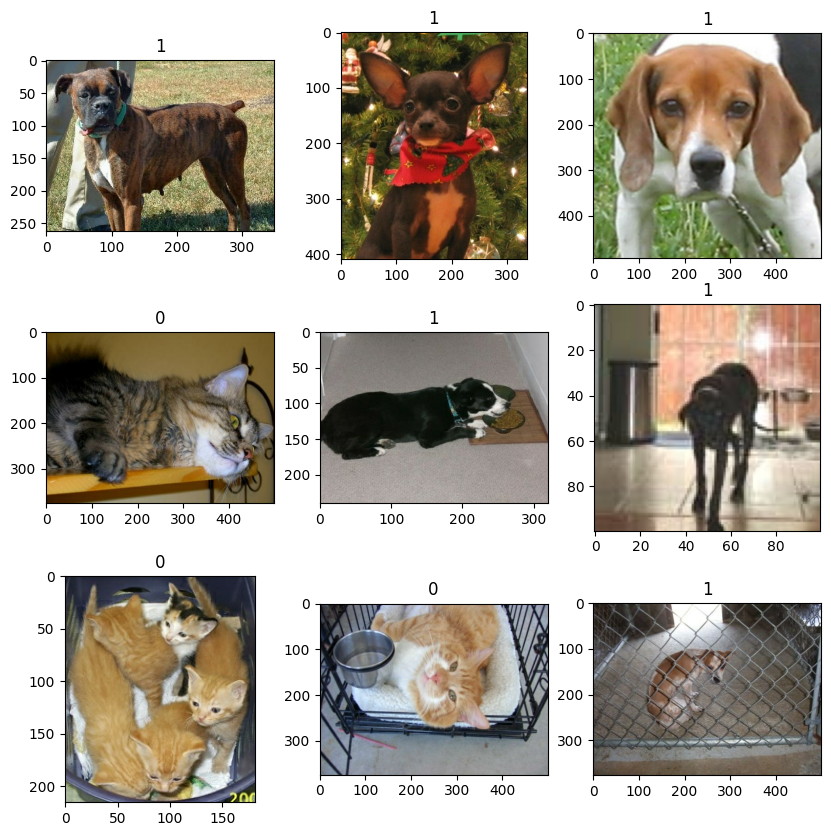

In [43]:
plt.figure(figsize=(10, 10))
for i , (image, label) in enumerate(train_dataset.take(9)):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)
    plt.title(int(label))
    

We can see `cat` is 0, and `dog` is 1 

#### Now it's time for the normalization, because the pictures are `RGB` one, the neuron nerwork need the dataset from 0 to 1, so we need to normalize them to this range 

In [44]:
# Here is using the map() function for convert every data in the dataset become the size we want
size = (150, 150)

train_dataset = train_dataset.map(lambda x, y: (tf.image.resize(x, size), y))
validation_dataset = validation_dataset.map(lambda x, y: (tf.image.resize(x, size), y))
test_dataset = test_dataset.map(lambda x, y: (tf.image.resize(x, size), y))

We can use batch of data to accelarate the data loading, this knowledge will be mentioned later

In [46]:
batch_size = 32

train_dataset = train_dataset.cache().batch(batch_size).prefetch(buffer_size=10)
validation_dataset = validation_dataset.cache().batch(batch_size).prefetch(buffer_size=10)
test_dataset = test_dataset.cache().batch(batch_size).prefetch(buffer_size=10)

#### You can see here we will Randomly add more data inside, when the data is not enough, remember we still have this solution

In [47]:
from tensorflow import keras
from tensorflow.keras import layers

In [48]:
data_augmentation = keras.Sequential(
    [layers.RandomFlip("horizontal"), layers.RandomRotation(0.1)]
)

2025-09-12 14:09:57.376809: W tensorflow/core/kernels/data/cache_dataset_ops.cc:917] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2025-09-12 14:09:57.659461: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


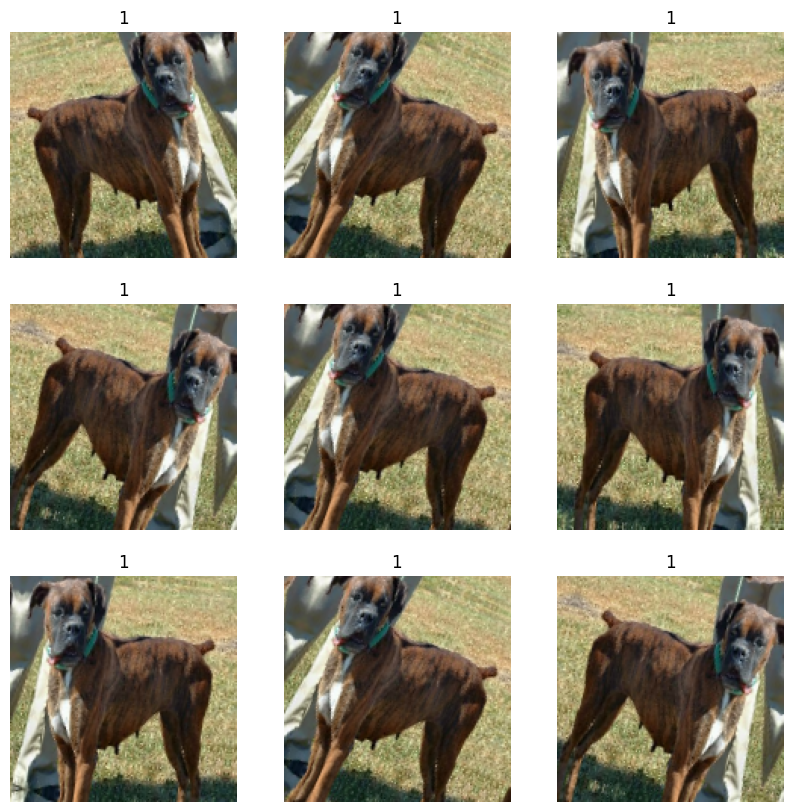

In [50]:
import numpy as np

for images, labels in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(
            tf.expand_dims(first_image, 0), training=True
        )
        plt.imshow(augmented_image[0].numpy().astype("int32"))
        plt.title(int(labels[0]))
        plt.axis("off")

#### Now it's time to set the model and do transfer learning

The code below using the base_model to collect features, then put the features into new model

In [51]:
base_model = keras.applications.Xception(
    weights="imagenet",  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False,
)  # Do not include the ImageNet classifier at the top.

# Freeze the base_model
base_model.trainable = False

# Create new model on top
inputs = keras.Input(shape=(150, 150, 3))
x = data_augmentation(inputs)  # Apply random data augmentation

# Pre-trained Xception weights requires that input be scaled
# from (0, 255) to a range of (-1., +1.), the rescaling layer
# outputs: `(inputs * scale) + offset`
scale_layer = keras.layers.Rescaling(scale=1 / 127.5, offset=-1)
x = scale_layer(x)

# The base model contains batchnorm layers. We want to keep them in inference mode
# when we unfreeze the base model for fine-tuning, so we make sure that the
# base_model is running in inference mode here.
x = base_model(x, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)  # Regularize with dropout
outputs = keras.layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_4 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 5, 5, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │         2,049 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,863,529 (79.59 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

# Here used very low
epochs = 5
model.fit(train_dataset, epochs=epochs, validation_data=validation_dataset)

#### After the transfer learning, we can refreeze all the layers to do Fine-tuning

In [ ]:
base_model.trainable = True

model.compile(
    optimizer=keras.optimizers.Adam(1e-5),  # Low learning rate
    loss=keras.losses.BinaryCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy()],
)

epochs = 1
model.fit(train_ds, epochs=epochs, validation_data=validation_ds)